In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

In [3]:
df = pd.read_csv('/Users/jac/Library/Mobile Documents/com~apple~CloudDocs/Desktop/NORTHEASTERN UNIVERSITY/COOP/BARABASI LAB/BANNED BOOKS/GitHub_BannedBooks/NETSI-banned-books/kasseler.csv')

# Data Consistency

### Checking for null raws

In [27]:
empty_author_count = df['author'].isnull().sum()
empty_title_count = df['title'].isnull().sum()
empty_place_count = df['place'].isnull().sum()
empty_year_count = df['year'].isnull().sum()

# The f-string allows you to embed expressions inside string literals, using curly braces {}.
# Print each count on a new line
print(f"Empty author count: {empty_author_count}")
print(f"Empty title count: {empty_title_count}")
print(f"Empty year count: {empty_place_count}")
print(f"Empty year count: {empty_year_count}")


Empty author count: 18477
Empty title count: 17
Empty year count: 87447
Empty year count: 65271


# Data Analysis

## Authors

### Exploring and visualising the most banned authors

In [9]:
author_counts = df['author'].value_counts()
top_10_authors = author_counts.head(10)
print(top_10_authors)

author
VOLTAIRE [i. e. AROUET François-Marie]     99
DEUTSCHE INFORMATIONSSTELLE                97
SIMENON Georges [i.e. VIOLIS Gaston]       84
KOCK Charles Paul de                       71
BALZAC Honoré de                           62
PAZ Octavio                                61
ALLEN Donna                                60
LENIN Vladimir [Владимир Ильич Ульянов]    60
ASIMOV Isaac [i.e. FRENCH Paul]            59
BUSCH Fritz Otto                           58
Name: count, dtype: int64


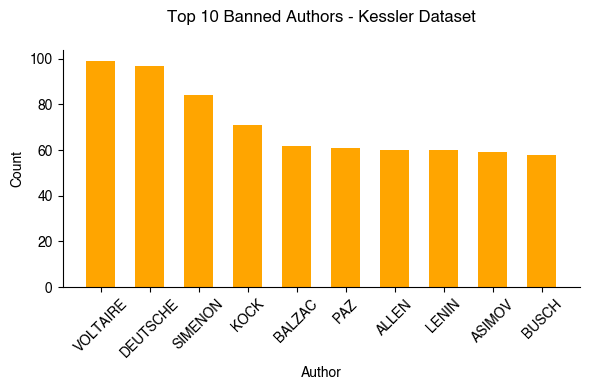

In [21]:
# Set the font to Helvetica
plt.rcParams['font.family'] = 'Helvetica'

# Create a figure and axis object with a larger figure size
fig, ax = plt.subplots(figsize=(6, 4))
capital_labels = ["".join(filter(str.isupper, name.split()[0])) for name in top_10_authors.index]

# Adding labels with counts above each bar
# for bar in bars:
#     height = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

# Plotting the bar chart with capital letters as labels and orange bars
ax.bar(capital_labels, top_10_authors.values, color='orange', width=0.6)

ax.set_xlabel('Author')
ax.set_ylabel('Count')
ax.set_title('Top 10 Banned Authors - Kessler Dataset', pad=20)
ax.tick_params(axis='x', rotation=45)

# Removing the top and right spines (box edges)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjusting the layout to give more space for the x-axis labels
plt.tight_layout()
plt.show()

<u>Attemtion</u>: DEUTSCHE is not a name + SIMONEN is a shared family name. Data cleaning needed to differentiate 2 authors with the same Family Name.

## Books

### Identification of the Year with most recurring banning

In [56]:
# Calculate the number of books published each year
year_counts = df['year'].value_counts()

# Print the result
print(year_counts.head(10))

year
1933.0    4800
1776.0    2885
2007.0    1203
2008.0    1202
2009.0    1172
1940.0    1142
2006.0     975
2005.0     895
1834.0     848
1845.0     821
Name: count, dtype: int64


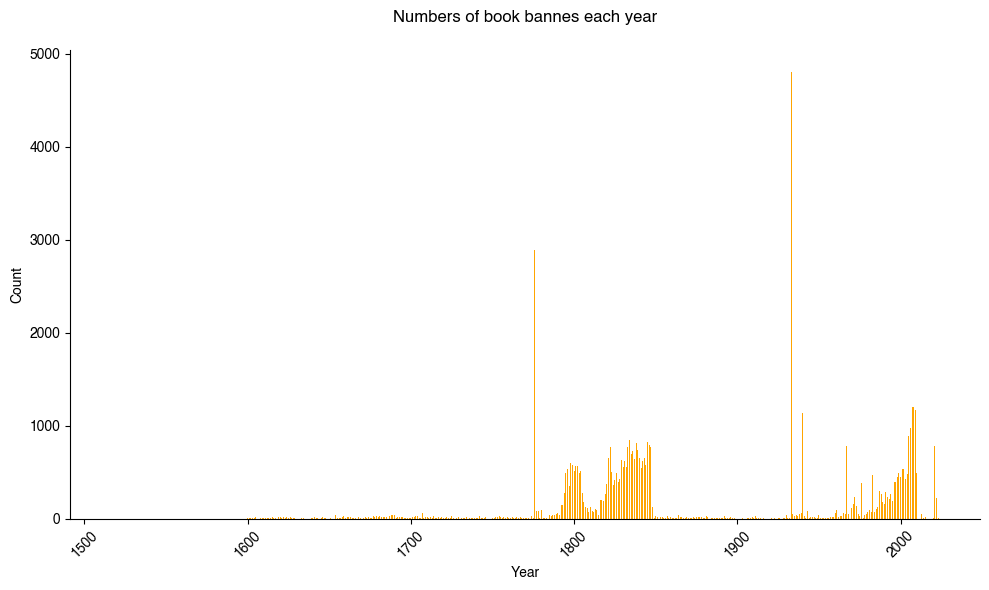

In [35]:
# Create a figure and axis object with a larger figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Filtrare i dati per includere solo i libri banditi dopo il 1450
df_filtered = df[df['year'] > 1450]
year_counts = df_filtered['year'].value_counts().sort_index()

# Tracciare il grafico a barre con barre arancioni
ax.bar(year_counts.index, year_counts.values, color='orange', width=0.6)

# Etichette degli assi e titolo
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Numbers of book bannes each year', pad=20)
ax.tick_params(axis='x', rotation=45)

# Removing the top and right spines (box edges)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjusting the layout to give more space for the x-axis labels
plt.tight_layout()
plt.show()

**1933**
- Nazi Party leader Adolf Hitler is appointed Chancellor of Germany by President of Germany Paul von Hindenburg.

**1776**
- American Revolution War
- King Louis XVI was the monarch of France. The ideas of the Enlightenment were gaining traction in France. Philosophers like Voltaire, Rousseau, and Montesquieu were influential, and their ideas about governance, rights, and society were contributing to a growing sense of dissatisfaction with the existing political order.

### Identification of Year Exceeding Maximum Threshold

In [53]:
# Filtrare i dati per includere solo i libri banditi dopo il 1450
df_filtered = df[df['year'] > 1450]

# Calcolare il numero di libri pubblicati ogni anno
year_counts = df_filtered['year'].value_counts()

# Definire le soglie
thresholds = [0, 1000, 2000, 3000, 4000]

# Determinare gli anni in cui il numero di libri pubblicati supera le soglie
years_exceeding_thresholds = {threshold: [] for threshold in thresholds}

for year, count in year_counts.items():
    for threshold in thresholds[::-1]:  # Itera partendo dalla soglia più alta
        if count > threshold:
            years_exceeding_thresholds[threshold].append(year)
            break  # Interrompi dopo aver trovato la soglia superata

# Stampare i risultati
for threshold, years in years_exceeding_thresholds.items():
    num_years = len(years)
    print(f"{num_years} years_count above the trashold {threshold}: {years}")


418 years_count above the trashold 0: [2006.0, 2005.0, 1834.0, 1845.0, 1838.0, 1846.0, 2021.0, 1967.0, 1822.0, 1847.0, 1833.0, 1839.0, 1836.0, 1835.0, 1843.0, 1821.0, 1840.0, 1837.0, 1829.0, 1842.0, 1831.0, 1798.0, 1799.0, 1844.0, 1801.0, 1802.0, 1832.0, 1830.0, 1841.0, 2002.0, 1796.0, 2001.0, 1804.0, 1800.0, 1823.0, 2010.0, 1999.0, 1826.0, 1795.0, 1803.0, 2004.0, 1983.0, 1998.0, 2000.0, 2003.0, 1828.0, 1825.0, 1997.0, 1996.0, 1827.0, 1976.0, 1820.0, 1824.0, 1797.0, 1987.0, 1991.0, 1794.0, 1805.0, 1994.0, 1988.0, 1819.0, 1972.0, 1992.0, 1784.0, 2022.0, 1993.0, 1817.0, 1816.0, 1818.0, 1995.0, 1806.0, 1989.0, 1971.0, 1990.0, 1793.0, 1792.0, 1973.0, 1807.0, 1810.0, 1986.0, 1848.0, 1808.0, 1970.0, 1813.0, 1985.0, 1961.0, 1780.0, 1981.0, 1814.0, 1777.0, 1943.0, 1778.0, 1969.0, 1811.0, 1982.0, 1812.0, 1980.0, 1984.0, 1809.0, 1707.0, 1960.0, 1939.0, 1790.0, 1965.0, 2013.0, 1968.0, 1934.0, 1979.0, 1789.0, 1966.0, 1938.0, 1974.0, 1689.0, 1654.0, 1978.0, 1690.0, 1815.0, 1950.0, 1791.0, 1688.0, 1

**2007-2008**
- The global financial crisis that began in 2007-2008 prompted economic uncertainty and social instability in many countries. 

### Identification of Number of Banned Books in different Historical Epocs

In [69]:
# Definire gli intervalli temporali per i periodi storici di interesse
periods = {
    "Second World War": (1939, 1945),
    "Enlightment": (1715, 1789)
}

# Contare il numero di libri menzionati in ciascun periodo storico
for period, years in periods.items():
    start_year, end_year = years
    num_books_in_period = df[(df['year'] >= start_year) & (df['year'] <= end_year)].shape[0]
    print(f"Number of books mentioned during the historical period '{period}': {num_books_in_period}")


Number of books mentioned during the historical period 'Second World War': 1361
Number of books mentioned during the historical period 'Enlightment': 4384


### Avarage of Banned Book per Year (since dataset's beginning)

In [71]:
# Calcolare il numero totale di libri banditi
total_banned_books = len(df)

# Determinare l'intervallo temporale del dataset
start_year = df['year'].min()
end_year = df['year'].max()

# Calcolare il numero di anni nel dataset
num_years = end_year - start_year + 1

# Calcolare la media di libri banditi ogni anno
average_banned_books_per_year = total_banned_books / num_years

print(f"Avarage (ca.) {average_banned_books_per_year:.2f}.")

Avarage (ca.) 60.07.


# Titles

### Counting words recurency in titles

In [67]:
# Convert all titles to lowercase for case-insensitive search
titles_lower = df['title'].str.lower()

# Count occurrences of 'jesus' in all titles
jesus_count = titles_lower.str.count('jesus').sum()
gay_count = titles_lower.str.count('gay').sum()
hitler_count = titles_lower.str.count('hitler').sum()


# Print the result
print("Number of times 'Jesus' appears in all titles:", jesus_count)
print("Number of times 'Gay' appears in all titles:", gay_count)
print("Number of times 'Hitler' appears in all titles:", hitler_count)

# Convert titles to strings (assuming they are not already)
df['title'] = df['title'].astype(str)

# Define translations of the word "God"
translations = ['God', 'Gott', 'Dio', 'Dieu']

# Count occurrences of translations of "God" in titles
god_counts = df['title'].str.count('|'.join(translations), flags=re.IGNORECASE).sum()

print("Number of times 'God' (& translations) appears in all titles:", god_counts)

Number of times 'Jesus' appears in all titles: 171
Number of times 'Gay' appears in all titles: 116
Number of times 'Hitler' appears in all titles: 534
Number of times 'God' (& translations) appears in all titles: 1826


In [73]:
# Convert titles to lowercase strings (assuming they are not already)
df['title'] = df['title'].astype(str).str.lower()

# Tokenize titles into words
all_words = ' '.join(df['title']).split()

# Define a regular expression pattern to extract words
word_pattern = re.compile(r'\b\w+\b')

# Extract words from titles using the pattern
all_words = word_pattern.findall(' '.join(df['title']).lower())

# Count the occurrences of each word
word_counts = Counter(all_words)

# Find the most common word
most_common_word, count = word_counts.most_common(1)[0]

print(f"The most quoted word in the titles is '{most_common_word}' with {count} occurrences.")

The most quoted word in the titles is 'der' with 20927 occurrences.


In [74]:
# Split titles into words and flatten the list of words
words = [word.lower() for title in df['title'] for word in title.split()]

# Count occurrences of each word
word_counts = Counter(words)

# Get the 10 most common words
top_10_words = word_counts.most_common(10)

# Print the results
print("The 10 most quoted words in the titles are:")
for word, count in top_10_words:
    print(f"{word}: {count} times")

The 10 most quoted words in the titles are:
der: 18364 times
und: 16237 times
de: 15753 times
la: 11040 times
the: 10119 times
des: 9723 times
die: 9370 times
in: 8801 times
of: 5791 times
et: 5047 times


# Location

### Location of banning

In [75]:
# Count the occurrences of each place and select the top 10
top_10_quoted_places = df['place'].value_counts().head(10)

# Print the result
print("Top 10 most quoted places:")
print(top_10_quoted_places)

Top 10 most quoted places:
place
Berlin         9698
Leipzig        3581
München        2067
Stuttgart      1187
Wien            862
Hamburg         786
Paris           755
Dresden         666
Frankfurt/M     466
Breslau         386
Name: count, dtype: int64
